# Data Viking Class

## 1. Data Analysis

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [6]:
data = pd.read_csv("../dataset/credit_risk.csv")
data.loc['credit_amount_dolar'] = data['credit_amount'] * 6

### 1.1 Variáveis e Explicações:

1. **age** (Idade do tomador de empréstimo):  
   - A idade do cliente no momento da solicitação do empréstimo.  

2. **sex** (Sexo declarado pelo tomador de empréstimo):  
   - Sexo do cliente, que pode ser "male" (masculino) ou "female" (feminino).

3. **job** (Ocupação do cliente):  
   - Profissão ou tipo de trabalho que o cliente exerce, podendo ser categorizado (por exemplo: autônomo, assalariado, empresário).

4. **housing** (Tipo de morada do cliente):  
   - Define o tipo de moradia do cliente:
     - **own**: Própria.
     - **rent**: Alugada.
     - **free**: Residência sem custo, como casa de parentes ou cedida por terceiros.  

5. **saving_account** (Conta poupança):  
   - Informação sobre a existência e/ou saldo médio de uma conta poupança do cliente. Pode ser categorizada como:
     - 'little', 'quite rich', 'rich' e 'moderate'.

6. **checking_account** (Conta corrente):  
   - Semelhante ao `saving_account`, mas refere-se à conta corrente do cliente.

7. **credit_amount** (Valor do crédito solicitado):  
   - Montante total do empréstimo solicitado pelo cliente.

8. **duration** (Duração):  
   - Tempo de duração do empréstimo em meses ou anos.

9. **purpose** (Propósito):  
   - Finalidade do empréstimo, como:
     - Compra de veículo, reforma, educação, entre outros.

10. **risk** (Risco):  
    - Avaliação qualitativa ou quantitativa do risco associado ao cliente:
      - Por exemplo: "good" (baixo risco) ou "bad" (alto risco).  

11. **reference** (Referência):  
    - Data de referência.  

12. **income** (Renda):  
    - Renda mensal ou anual declarada pelo cliente.

13. **cpf** (Cadastro de Pessoa Física):  
    - Identificação única do cliente no Brasil, usada para análises de crédito e consultas.  

14. **score_serasa** (Score de crédito no Serasa):  
    - Pontuação fornecida pelo Serasa, que avalia a probabilidade de inadimplência do cliente.  

---

In [7]:
print("Tamanho do dataset: ", data.shape)

Tamanho do dataset:  (1000, 15)


In [8]:
print("Quantidade de Valores Nulos Por variável: ")
data.isnull().sum()

Quantidade de Valores Nulos Por variável: 


Unnamed: 0            0
age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
reference             0
income              971
cpf                   0
score_serasa          0
dtype: int64

### 1.2 Análise Univariada

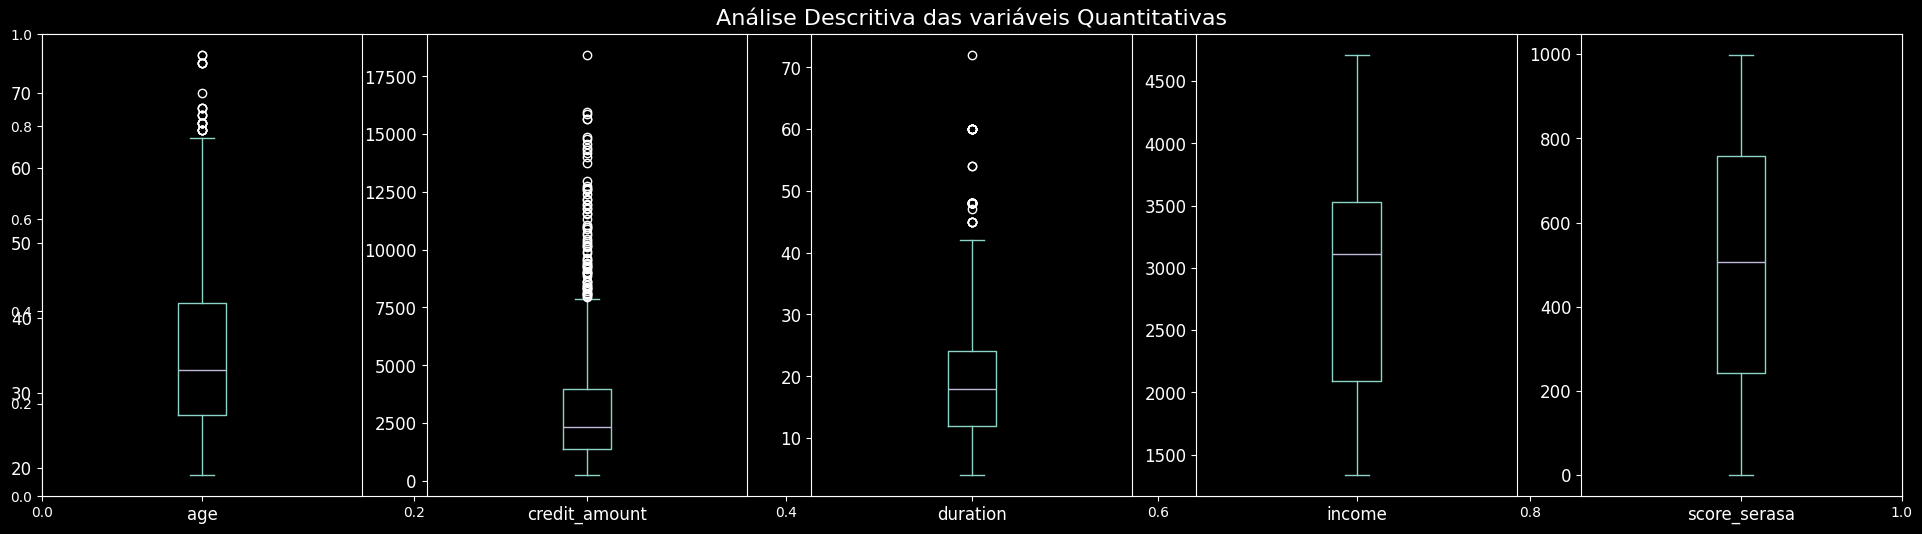

In [30]:
 #layouts
fig = plt.figure(figsize=(24, 6))
plt.title("Análise Descritiva das variáveis Quantitativas", fontsize = 16)
layout = (1, 5)
box_1 = plt.subplot2grid(layout, (0, 0))
box_2 = plt.subplot2grid(layout, (0, 1))
box_3 = plt.subplot2grid(layout, (0, 2))
box_4 = plt.subplot2grid(layout, (0, 3))
box_5 = plt.subplot2grid(layout, (0, 4))

data[['age']].plot(ax=box_1, kind='box', fontsize=12)
data[['credit_amount']].plot(ax=box_2, kind='box', fontsize=12) 
data[['duration']].plot(ax=box_3, kind='box', fontsize=12)
data[['income']].plot(ax=box_4, kind='box', fontsize=12)  
data[['score_serasa']].plot(ax=box_5, kind='box', fontsize=12);

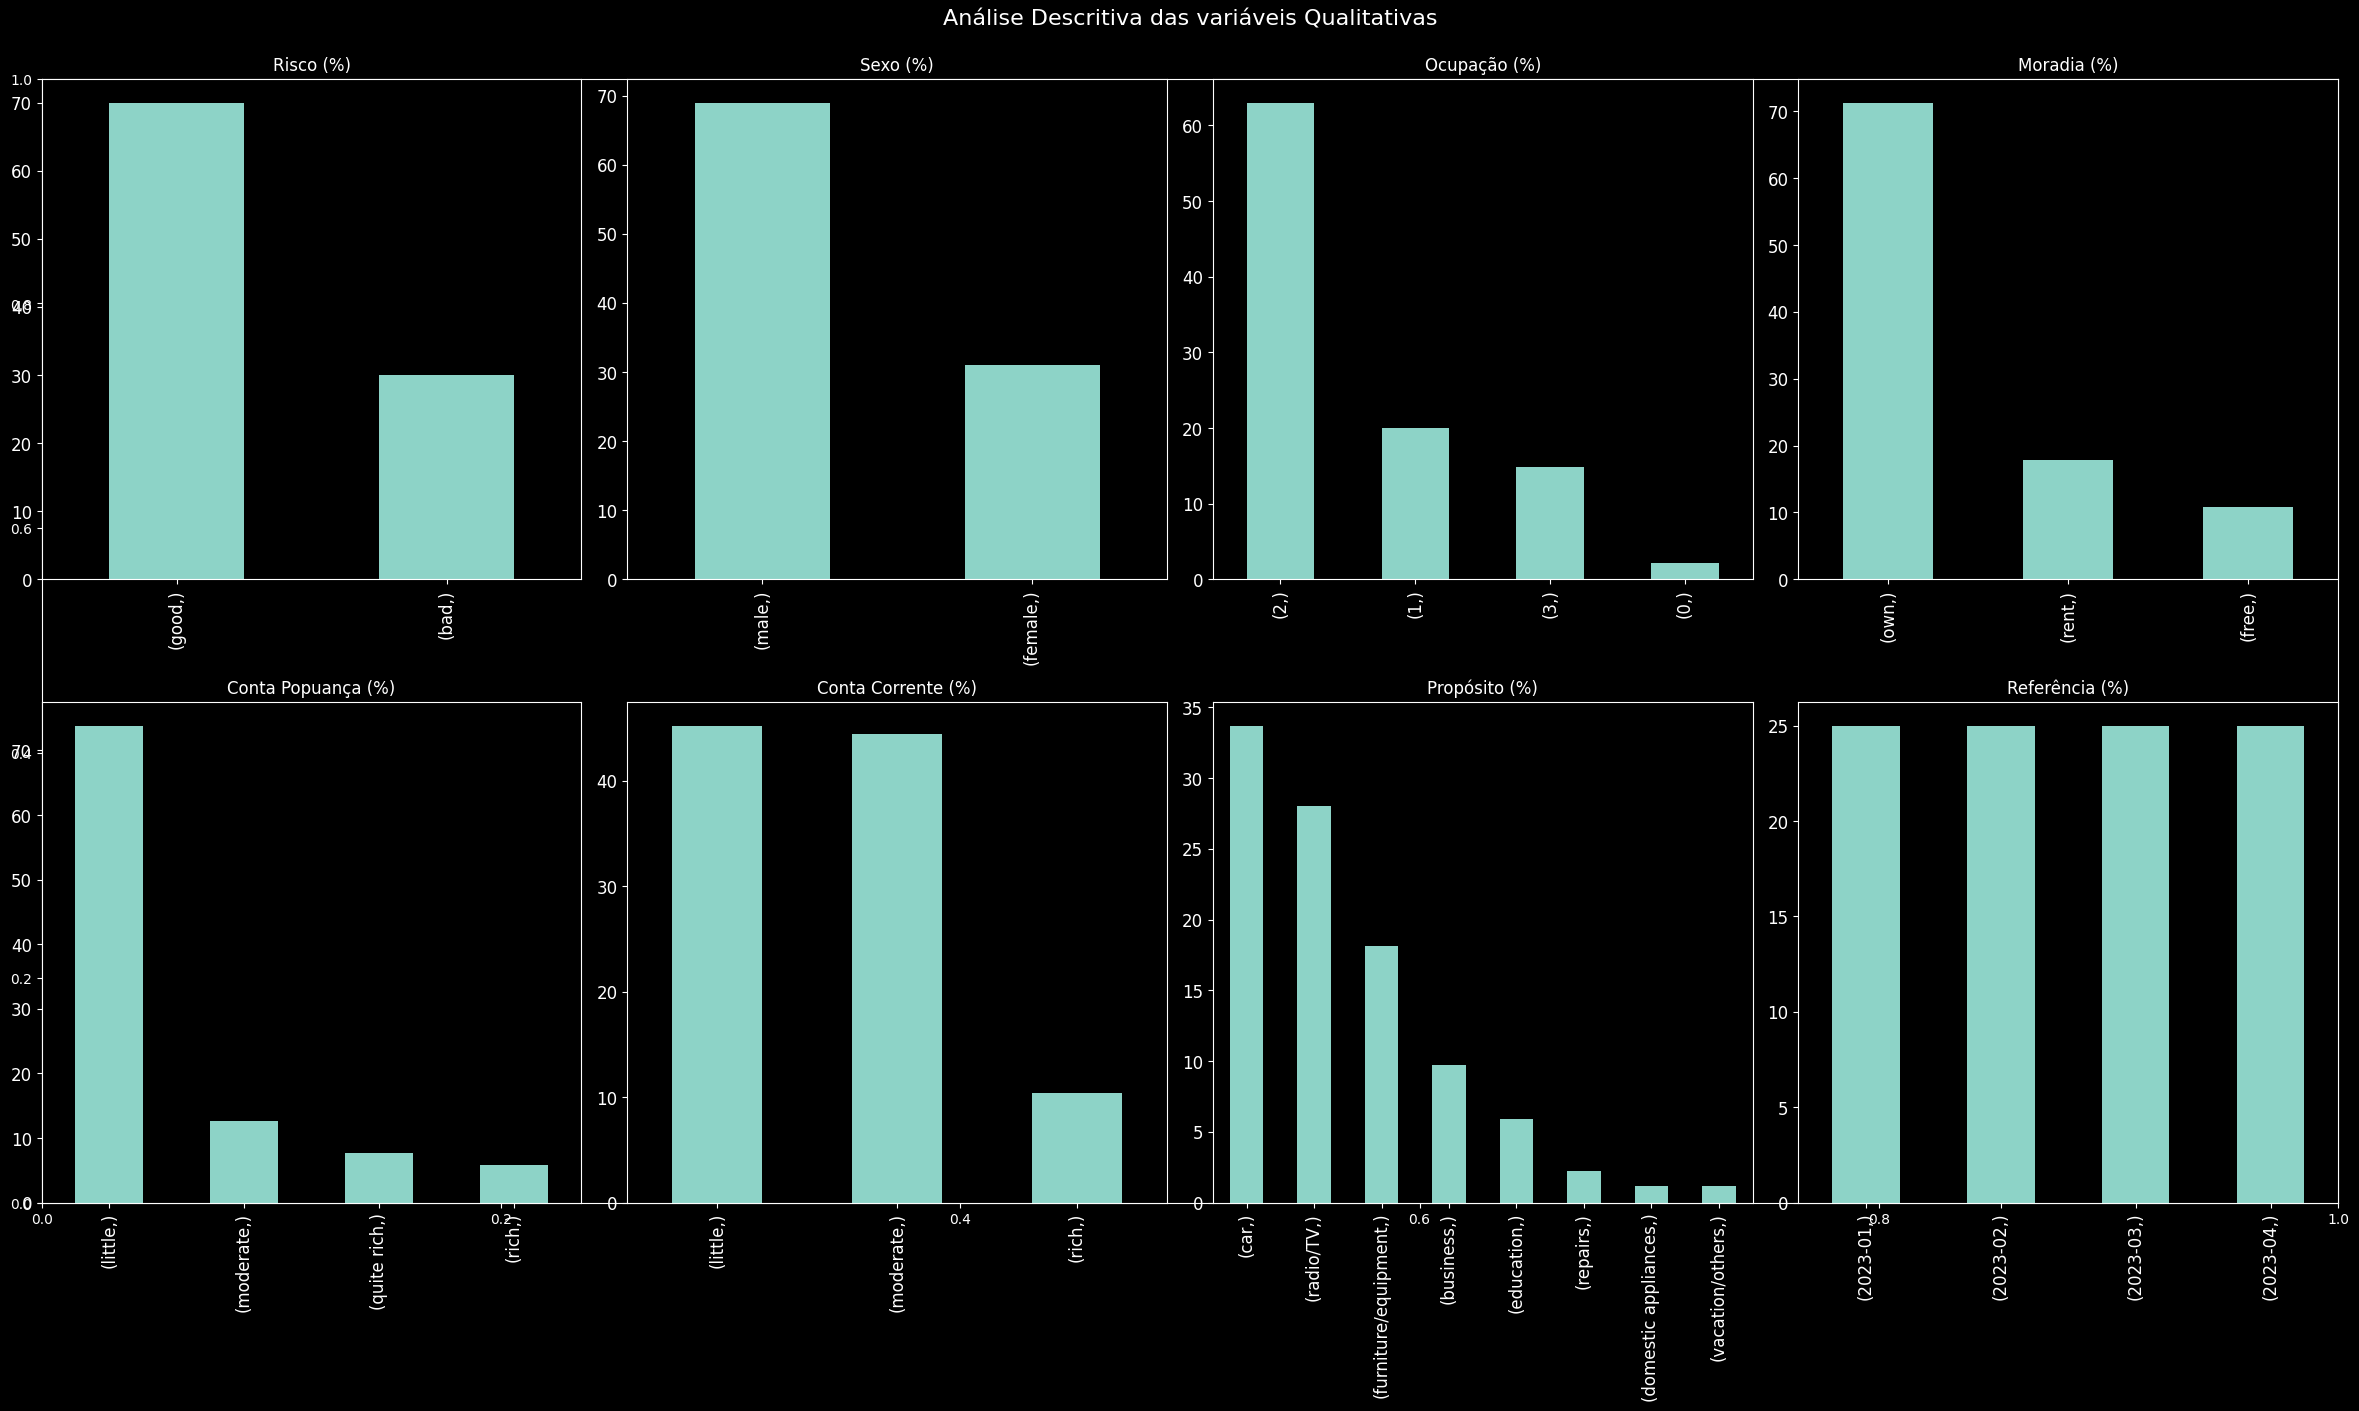

In [62]:
 #layouts
fig = plt.figure(figsize=(24, 16))
plt.title("Análise Descritiva das variáveis Qualitativas", fontsize = 16, y=1.04)
layout = (2, 4)
box_1 = plt.subplot2grid(layout, (0, 0))
box_2 = plt.subplot2grid(layout, (0, 1))
box_3 = plt.subplot2grid(layout, (0, 2))
box_4 = plt.subplot2grid(layout, (0, 3))
box_5 = plt.subplot2grid(layout, (1, 0))
box_6 = plt.subplot2grid(layout, (1, 1))
box_7 = plt.subplot2grid(layout, (1, 2))
box_8 = plt.subplot2grid(layout, (1, 3))

data[['risk']].value_counts(normalize=True).mul(100).plot(ax=box_1, kind='bar', fontsize=12, title="Risco (%)")
box_1.set_xlabel("")
data[['sex']].value_counts(normalize=True).mul(100).plot(ax=box_2, kind='bar', fontsize=12, title="Sexo (%)")
box_2.set_xlabel("")
data[['job']].value_counts(normalize=True).mul(100).plot(ax=box_3, kind='bar', fontsize=12, title="Ocupação (%)")
box_3.set_xlabel("")
data[['housing']].value_counts(normalize=True).mul(100).plot(ax=box_4, kind='bar', fontsize=12, title="Moradia (%)")
box_4.set_xlabel("")
data[['saving_accounts']].value_counts(normalize=True).mul(100).plot(ax=box_5, kind='bar', fontsize=12, title="Conta Popuança (%)")
box_5.set_xlabel("")
data[['checking_account']].value_counts(normalize=True).mul(100).plot(ax=box_6, kind='bar', fontsize=12, title="Conta Corrente (%)")
box_6.set_xlabel("")
data[['purpose']].value_counts(normalize=True).mul(100).plot(ax=box_7, kind='bar', fontsize=12, title="Propósito (%)")
box_7.set_xlabel("")
data[['reference']].value_counts(normalize=True).mul(100).plot(ax=box_8, kind='bar', fontsize=12, title="Referência (%)")
box_8.set_xlabel("")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

### 1.2 Análise Bivariada

- Tratar a variável idade (discreta) como qualitativa.

In [7]:
#Definindo a sequencia de classes, a menor idade é 19 e a maior é 75 anos,
#Vamos considerar valores minimo e maximo do nosso intervalo entre <= 18 e >= 56.
#Amplitude
intervalos = [18, 25, 35, 45, 55, 75]
rotulos = ['19-25', '26-35', '36-45', '46-55', '>= 56']

In [8]:
data['class_age'] = pd.cut(data['age'], bins=intervalos, labels=rotulos, right=True, include_lowest=True)


/tmp/ipykernel_499/2728439790.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = data.groupby(['class_age', 'risk']).size().unstack(fill_value=0)


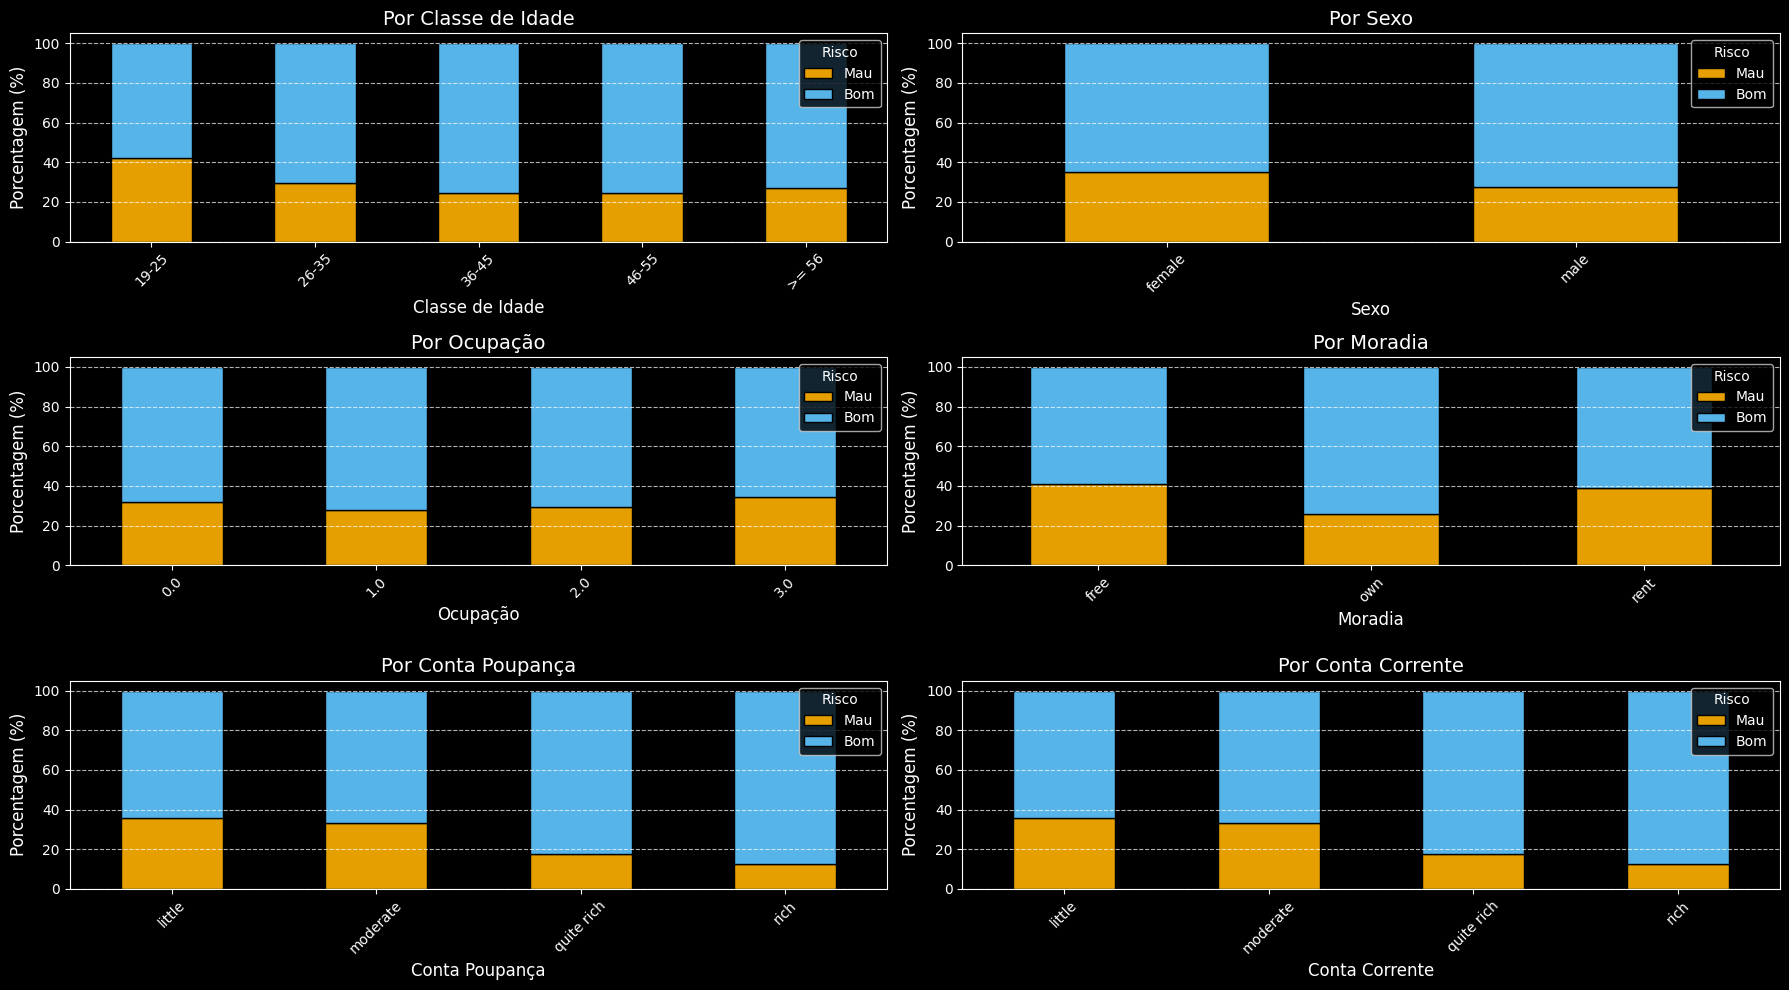

In [13]:
percentages = data.groupby(['class_age', 'risk']).size().unstack(fill_value=0)
percentages = percentages.div(percentages.sum(axis=1), axis=0).mul(100)

perc_sex = data.groupby(['sex', 'risk']).size().unstack(fill_value=0)
perc_sex = perc_sex.div(perc_sex.sum(axis=1), axis=0).mul(100)

perc_job = data.groupby(['job', 'risk']).size().unstack(fill_value=0)
perc_job = perc_job.div(perc_job.sum(axis=1), axis=0).mul(100)

perc_housing = data.groupby(['housing', 'risk']).size().unstack(fill_value=0)
perc_housing = perc_housing.div(perc_housing.sum(axis=1), axis=0).mul(100)

perc_checking_account = data.groupby(['checking_account', 'risk']).size().unstack(fill_value=0)
perc_checking_account = perc_checking_account.div(perc_checking_account.sum(axis=1), axis=0).mul(100)

perc_saving_accounts = data.groupby(['saving_accounts', 'risk']).size().unstack(fill_value=0)
perc_saving_accounts = perc_saving_accounts.div(perc_saving_accounts.sum(axis=1), axis=0).mul(100)

fig, axes = plt.subplots(3, 2, figsize=(34, 40)) 
plt.title("Distribuição Percentual de Bons e Maus", fontsize = 16, y=1.04)

# Plotando o gráfico
percentages.plot(ax=axes[0,0], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black', title= "Por Classe de Idade")
axes[0,0].set_title("Por Classe de Idade", fontsize=14)
axes[0,0].set_xlabel("Classe de Idade", fontsize=12)
axes[0,0].set_ylabel("Porcentagem (%)", fontsize=12)
axes[0,0].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10)
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,0].tick_params(axis='x', rotation=45)

perc_sex.plot(ax=axes[0,1], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black', title= "Por Sexo")
axes[0,1].set_title("Por Sexo", fontsize=14)
axes[0,1].set_xlabel("Sexo", fontsize=12)
axes[0,1].set_ylabel("Porcentagem (%)", fontsize=12)
axes[0,1].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10)
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,1].tick_params(axis='x', rotation=45)

perc_job.plot(ax=axes[1,0], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black')
axes[1,0].set_title("Por Ocupação", fontsize=14)
axes[1,0].set_xlabel("Ocupação", fontsize=12)
axes[1,0].set_ylabel("Porcentagem (%)", fontsize=12)
axes[1,0].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10, loc='upper right')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,0].tick_params(axis='x', rotation=45)

perc_housing.plot(ax=axes[1,1], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black')
axes[1,1].set_title("Por Moradia", fontsize=14)
axes[1,1].set_xlabel("Moradia", fontsize=12)
axes[1,1].set_ylabel("Porcentagem (%)", fontsize=12)
axes[1,1].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10)
axes[1,1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,1].tick_params(axis='x', rotation=45)

perc_saving_accounts.plot(ax=axes[2,0], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black')
axes[2,0].set_title("Por Conta Poupança", fontsize=14)
axes[2,0].set_xlabel("Conta Poupança", fontsize=12)
axes[2,0].set_ylabel("Porcentagem (%)", fontsize=12)
axes[2,0].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10, loc='upper right')
axes[2,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[2,0].tick_params(axis='x', rotation=45)

perc_saving_accounts.plot(ax=axes[2,1], kind='bar', stacked=True, figsize=(18, 10), color=["#E69F00", "#56B4E9"], edgecolor='black')
axes[2,1].set_title("Por Conta Corrente", fontsize=14)
axes[2,1].set_xlabel("Conta Corrente", fontsize=12)
axes[2,1].set_ylabel("Porcentagem (%)", fontsize=12)
axes[2,1].legend(title="Risco", labels=['Mau', 'Bom'], fontsize=10, loc='upper right')
axes[2,1].grid(axis='y', linestyle='--', alpha=0.7)
axes[2,1].tick_params(axis='x', rotation=45)



plt.tight_layout()
plt.show()

In [15]:
perc_sex["bm"] = perc_sex['good']/perc_sex['bad']
perc_sex

risk,bad,good,bm
sex,,,
female,35.161290,64.838710,1.844037
male,27.681159,72.318841,2.612565


In [16]:
percentages["bm"] = percentages['good']/percentages['bad']
percentages

risk,bad,good,bm
class_age,,,
19-25,42.105263,57.894737,1.375000
26-35,29.648241,70.351759,2.372881
36-45,24.336283,75.663717,3.109091
46-55,24.347826,75.652174,3.107143
>= 56,26.760563,73.239437,2.736842


In [31]:
data.columns 

Index(['Unnamed: 0', 'age', 'sex', 'job', 'housing', 'saving_accounts',
       'checking_account', 'credit_amount', 'duration', 'purpose', 'risk',
       'reference', 'income', 'cpf', 'score_serasa'],
      dtype='object')